<a href="https://colab.research.google.com/github/Adiii99/LP3/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/sample_data/diabetes.csv")


In [ ]:
df.shape

(768, 9)

In [ ]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

In [ ]:
set(df.dtypes)

{dtype('int64'), dtype('float64')}

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#input data
x = df.drop('Outcome', axis=1)

#output data
y = df['Outcome']

In [ ]:
x.shape

(768, 8)

In [ ]:
y.shape

(768,)

In [ ]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

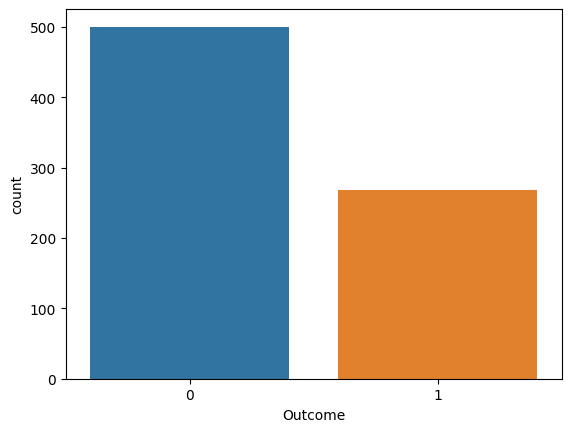

In [ ]:
sns.countplot(x = y)

In [ ]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [ ]:
x_train.shape

(576, 8)

In [ ]:
x_test.shape

(192, 8)

In [ ]:
# KNN algoritham
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#create object
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
#Train the algo
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

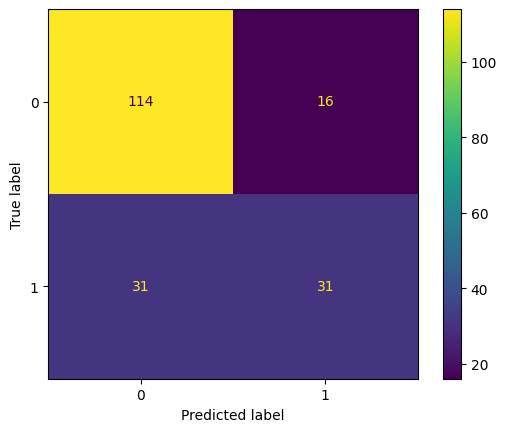

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.66      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192



In [ ]:
accuracy_score(y_test,y_pred)

0.7552083333333334

In [ ]:
# accuracy_score : 0.7552083333333334 when n=5

In [ ]:
#Finding suitable value for k
import numpy as np
import matplotlib.pyplot as plt

error = []

In [ ]:
for k in range (1,41):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train,y_train)
  pred = knn.predict(x_test)
  error.append(np.mean(pred != y_test))

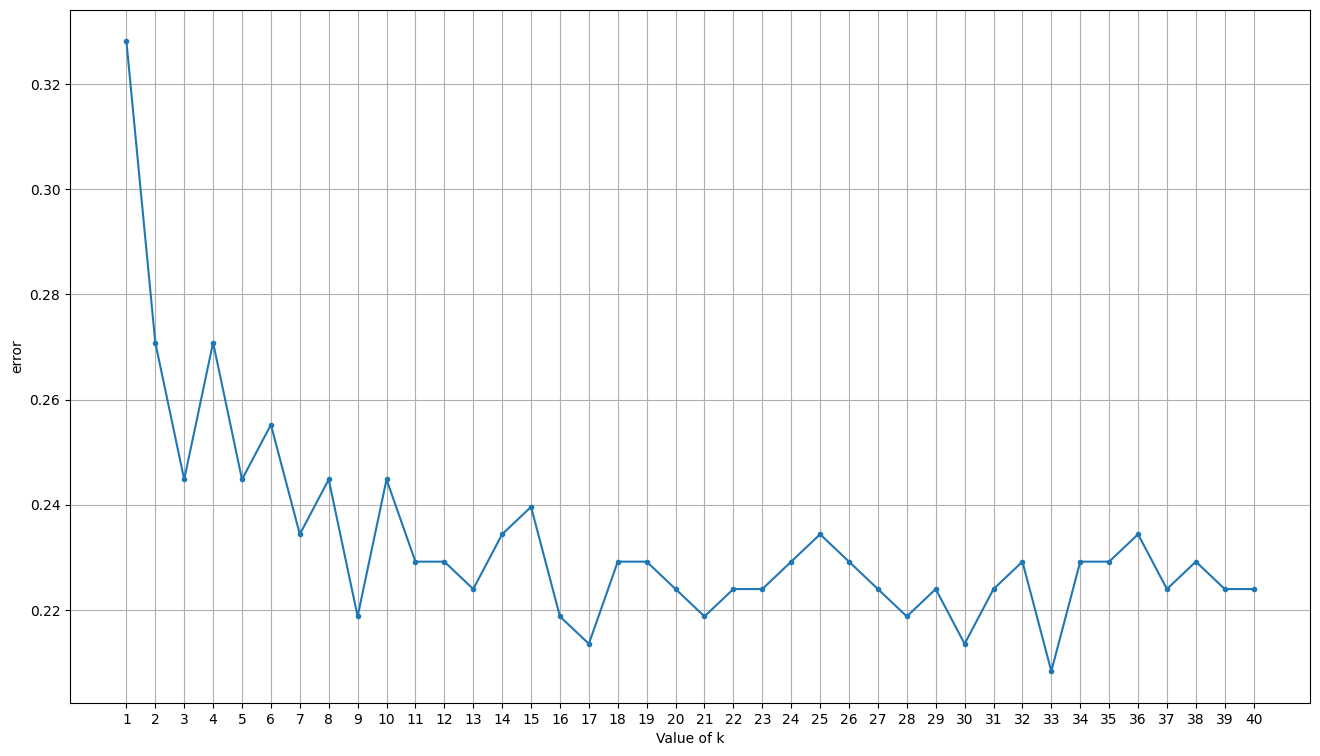

In [ ]:
plt.figure(figsize=(16,9))
plt.xlabel("Value of k")
plt.ylabel("error")
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41), error, marker='.')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=33)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192



In [ ]:
accuracy_score(y_test,y_pred)

0.7916666666666666

In [ ]:
# accuracy_score : 0.7916666666666666 when n=33